In [1]:
import torch
import numpy as np
from ANN_model import Features12_NN, Features12_NN2, Features7_NN
from Dataset import Features12_dataset
from Utils import loss_plot
from torch.utils.data import DataLoader
from Train import train_model

c:\Users\smcmlab4\Anaconda3\envs\python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
BATCH_SIZE = 128
RANDOM_STATE = 42
CLEANED = True

if CLEANED:
    X = np.load('Numeric_feature_dataset/features12_train_cleaned.npy')
    y = np.load('Numeric_feature_dataset/target_train_cleaned.npy')
    print('Using cleaned data')
else:
    X = np.load('Numeric_feature_dataset/features12_train.npy')
    y = np.load('Numeric_feature_dataset/target_train.npy')

X = np.delete(X, [10, 11, 6, 0, 1], axis=1)

train_dataset = Features12_dataset(X, y, train=True, random_state=RANDOM_STATE)
test_dataset = Features12_dataset(X, y, train=False, random_state=RANDOM_STATE)
print('Total num of data:', train_dataset.__len__()+test_dataset.__len__())
y_scaler_train = train_dataset.get_y_scaler()
y_scaler_test = test_dataset.get_y_scaler()

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=test_dataset.__len__(), shuffle=False)

Using cleaned data
Total num of data: 11750


In [3]:
model = Features7_NN(in_features=7)
model_trained, trainloss, testloss = train_model(model, train_loader, test_loader, y_scaler_train, y_scaler_test, num_epochs=1000, lr=0.01, weight_decay=1e-4, factor=0.5, min_lr=1e-6, patience=50, threshold=0.001)

[Epoch 1/1000] train_loss: 0.061631, test_loss: 0.025363 | train_mape: 37.7927, test_mape: 27.0437
[Epoch 2/1000] train_loss: 0.025114, test_loss: 0.023250 | train_mape: 27.6842, test_mape: 26.3886
[Epoch 3/1000] train_loss: 0.023106, test_loss: 0.018843 | train_mape: 26.3888, test_mape: 24.8989
[Epoch 4/1000] train_loss: 0.016508, test_loss: 0.011876 | train_mape: 21.9020, test_mape: 18.9753
[Epoch 5/1000] train_loss: 0.012873, test_loss: 0.010984 | train_mape: 19.6671, test_mape: 17.7279
[Epoch 6/1000] train_loss: 0.011842, test_loss: 0.009918 | train_mape: 18.7039, test_mape: 17.2134
[Epoch 7/1000] train_loss: 0.011775, test_loss: 0.010297 | train_mape: 18.7006, test_mape: 16.4220
[Epoch 8/1000] train_loss: 0.011472, test_loss: 0.010143 | train_mape: 18.5656, test_mape: 16.3965
[Epoch 9/1000] train_loss: 0.011490, test_loss: 0.010476 | train_mape: 18.2666, test_mape: 17.4509
[Epoch 10/1000] train_loss: 0.011318, test_loss: 0.010035 | train_mape: 18.3935, test_mape: 18.3694
[Epoch 11

In [4]:
from Utils import save_with_unique_name 
#### 記得改檔名 ####
filename = 'Models/features7_model5.pt'
filename = save_with_unique_name(filename)
torch.save(model_trained.state_dict(), filename)

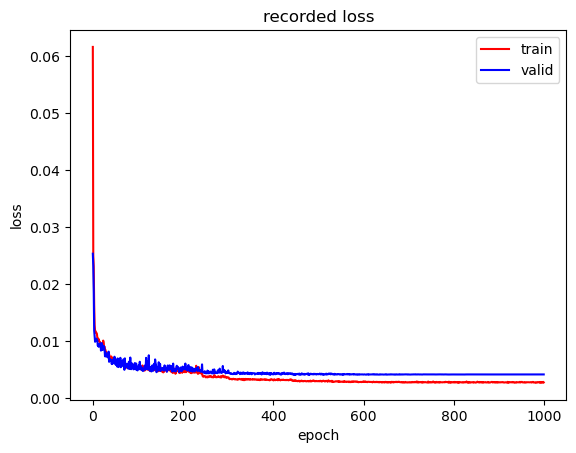

In [5]:
loss_plot(trainloss, testloss)

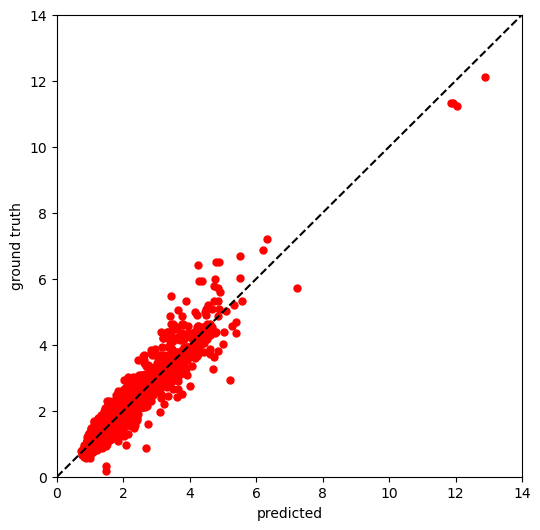

In [6]:
from Utils import true_pred_plot, model_pred

pred_test, true_test = model_pred(model_trained, test_loader, y_scaler_test)
true_pred_plot(pred_test, true_test)

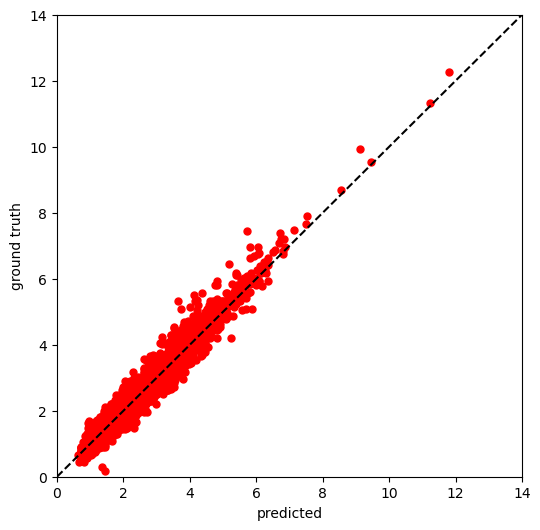

In [7]:
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=False)
pred_train, true_train = model_pred(model_trained, train_loader, y_scaler_train)
true_pred_plot(pred_train, true_train)